In [2]:
#@title **MONTAR EL DRIVE** { display-mode: "form" }
import os
from google.colab import drive

path_ai = "ai-uis-student/PROYECTO_IA/" #@param {type:"string"}
path = "/content/drive/My Drive/" + path_ai
drive.mount('/content/drive', force_remount=True)
os.chdir(path)
print(os.getcwd())

Mounted at /content/drive
/content/drive/My Drive/ai-uis-student/PROYECTO_IA


In [3]:
!pip install pyqt5
!apt-get install -y qt5-default
!pip install pygsheets
!pip install ipympl
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension
!jupyter nbextension enable --py ipympl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 360.5/360.5 kB 33.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.9/59.9 MB 14.0 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Package qt5-default is not available, but is referred to by another package.
This may mean that the package is missing, has been obsoleted, or
is only available from another source

E: Package 'qt5-default' has no installation candidate
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.2/158.2 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.6/511.6 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.1 MB/s eta 0:00:00
Enabling notebook extension jupyter-js-widgets/extension...
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json
Paths used for configuration of notebo

In [4]:
import cv2
import requests
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from ipywidgets import interact
import ipympl
import os
import pywt
import io
from google.colab.patches import cv2_imshow
from google.colab import output
import gspread
from google.colab import auth
from oauth2client.client import GoogleCredentials
import pygsheets
from google.colab import files
from google.colab import drive
from google.oauth2 import service_account
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import h5py
import ast
output.enable_custom_widget_manager()

In [5]:
# Cargar el dataset desde la URL (SOLO EJECUTAR LA PRIMERA VEZ)
df = pd.read_csv('https://raw.githubusercontent.com/hendrik21/cardConditionClassifier/591d300cf9b6bc33f78085052733575de2209563/card_condition_dataset.csv')
cardData = df
# Cargar el dataset que contiene los datos de color (SOLO EJECUTAR LA PRIMERA VEZ)
df_color = pd.read_csv('https://raw.githubusercontent.com/hendrik21/cardConditionClassifier/main/card_condition_dataset.csv')
cardData['Color'] = df_color['Color']
cardData = pd.concat([cardData, df_color[64:]], ignore_index=True)

In [6]:
cardData[10:]

Nombre  Coleccion  Fecha Condicion  \
10   Force of Will  Alliances   1996        GD   
11   Force of Will  Alliances   1996        GD   
12   Force of Will  Alliances   1996        GD   
13   Force of Will  Alliances   1996        GD   
14   Force of Will  Alliances   1996        GD   
..             ...        ...    ...       ...   
140  Healing Salve      Alpha   1993        LP   
141  Healing Salve      Alpha   1993        LP   
142         Plains      Alpha   1993        MT   
143         Plains      Alpha   1993        MT   
144         Plains      Alpha   1993        MT   

                                                   URL result_image_side1  \
10   https://marketplace-article-scans-production-c...                NaN   
11   https://marketplace-article-scans-production-c...                NaN   
12   https://marketplace-article-scans-production-c...                NaN   
13   https://marketplace-article-scans-production-c...                NaN   
14   https://marketplace-article-scans-production-c...                NaN   
..                                                 ...                ...   
140  https://marketplace-article-scans-production-c...                NaN   
141  https://marketplace-article-scans-production-c...                NaN   
142  https://marketplace-article-scans-production-c...                NaN   
143  https://marketplace-article-scans-production-c...                NaN   
144  https://marketplace-article-scans-production-c...                NaN   

    result_image_side2   Color  
10                 NaN    Azul  
11                 NaN    Azul  
12                 NaN    Azul  
13                 NaN    Azul  
14                 NaN    Azul  
..                 ...     ...  
140                NaN  Blanco  
141                NaN  Blanco  
142                NaN  Blanco  
143                NaN  Blanco  
144                NaN  Blanco  

[135 rows x 8 columns]

In [7]:
index = 127

In [ ]:
# Obtener la imagen desde la URL
url = 'https://marketplace-article-scans-production-current.s3.eu-central-1.amazonaws.com/1277834619/1277834619.jpg'
response = requests.get(url)
image_bytes = response.content

# Convertir los bytes de la imagen en un array numpy
image_array = np.frombuffer(image_bytes, np.uint8)

# Cargar la imagen en OpenCV
image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)

In [ ]:
def select_roi_points(image):
    fig, ax = plt.subplots()
    ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    ax.set_title('Selecciona los puntos de la región de interés')
    ax.axis('off')

    point_counter = 1

    def onclick(event):
        nonlocal point_counter

        roi_points.append((event.xdata, event.ydata))
        ax.plot(event.xdata, event.ydata, 'ro')
        ax.text(event.xdata, event.ydata, f'Punto {point_counter}', color='red')
        fig.canvas.draw()

        point_counter += 1

    fig.canvas.mpl_connect('button_press_event', onclick)

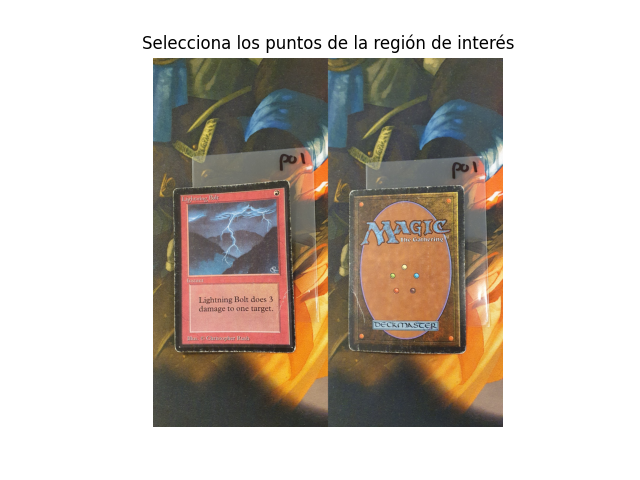

In [ ]:
# Verificar si la imagen se cargó correctamente
if image is None:
    print("No se pudo cargar la imagen")
else:
  roi_points = []
  # Llamar a la función para seleccionar los puntos de la región de interés
  select_roi_points(image)

  # Mostrar la imagen y esperar a que se seleccionen los puntos
  plt.show()

In [ ]:
# Verificar si se han seleccionado los puntos suficientes
if len(roi_points) != 8:
  print('No se seleccionaron los puntos suficientes.')
  exit()

  # Imprimir los puntos seleccionados y su orden
for i, point in enumerate(roi_points):
  print(f'Punto {i+1}: ({point[0]}, {point[1]})')

Punto 1: (91.68181818181813, 699.8636363636363)
Punto 2: (746.2272727272726, 656.2272727272725)
Punto 3: (778.9545454545452, 1605.3181818181818)
Punto 4: (113.5, 1605.3181818181818)
Punto 5: (1062.590909090909, 716.2272727272725)
Punto 6: (1695.318181818181, 688.9545454545453)
Punto 7: (1706.227272727272, 1616.2272727272725)
Punto 8: (1062.590909090909, 1594.409090909091)


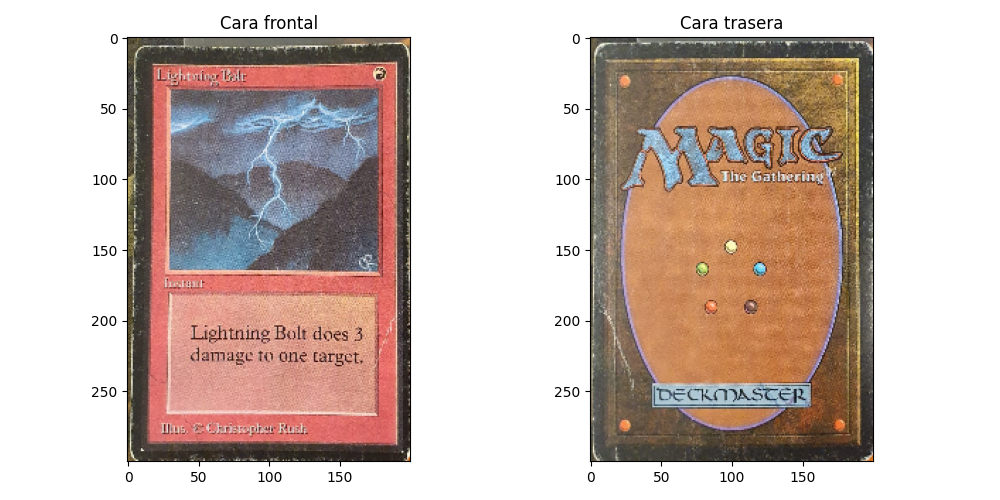

In [ ]:
# Definir las dimensiones esperadas para cada lado de la carta
width_side1 = 200
height_side1 = 300
width_side2 = 200
height_side2 = 300
# Convertir los puntos a un arreglo numpy de tipo float32
roi_points = np.array(roi_points, dtype=np.float32)

# Dividir los puntos en dos grupos correspondientes a cada lado de la carta
points_side1 = roi_points[:4]
points_side2 = roi_points[4:]

# Definir los puntos correspondientes en la imagen de salida (frontal) para cada lado de la carta
output_points_side1 = np.array([[0, 0], [width_side1, 0], [width_side1, height_side1], [0, height_side1]], dtype=np.float32)
output_points_side2 = np.array([[0, 0], [width_side2, 0], [width_side2, height_side2], [0, height_side2]], dtype=np.float32)

# Calcular la matriz de transformación de perspectiva para cada lado de la carta
transform_matrix_side1 = cv2.getPerspectiveTransform(points_side1, output_points_side1)
transform_matrix_side2 = cv2.getPerspectiveTransform(points_side2, output_points_side2)

# Aplicar la transformación de perspectiva a cada lado de la carta
result_image_side1 = cv2.warpPerspective(image, transform_matrix_side1, (width_side1, height_side1))
result_image_side2 = cv2.warpPerspective(image, transform_matrix_side2, (width_side2, height_side2))
# Crear una figura con dos subplots en orden horizontal
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
# Convertir las imágenes a RGB
result_image_side1 = cv2.cvtColor(result_image_side1, cv2.COLOR_BGR2RGB)
result_image_side2 = cv2.cvtColor(result_image_side2, cv2.COLOR_BGR2RGB)

# Mostrar la cara frontal
axs[0].imshow(result_image_side1)
axs[0].set_title("Cara frontal")

# Mostrar la cara trasera
axs[1].imshow(result_image_side2)
axs[1].set_title("Cara trasera")

# Ajustar los espacios entre los subplots
plt.tight_layout()

# Mostrar la figura
plt.show()

In [ ]:
# Guardar los arrays en un archivo HDF5
with h5py.File('/content/drive/My Drive/ai-uis-student/PROYECTO_IA/imageArray/imageArray' + str(index) +'.h5', 'w') as f:
    f.create_dataset('result_image_side1', data=result_image_side1)
    f.create_dataset('result_image_side2', data=result_image_side2)
files.download('/content/drive/My Drive/ai-uis-student/PROYECTO_IA/imageArray/imageArray' + str(index) +'.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [8]:
for i in range(0, index+1):
    file_path = '/content/drive/My Drive/ai-uis-student/PROYECTO_IA/imageArray/imageArray' + str(i) + '.h5'
    # Verificar si el archivo existe
    if os.path.exists(file_path):
        with h5py.File(file_path, 'r') as f:
            result_image_side1 = f['result_image_side1'][:]
            result_image_side2 = f['result_image_side2'][:]

        # Asignar los datos al DataFrame cardData
        cardData.at[i, 'result_image_side1'] = result_image_side1
        cardData.at[i, 'result_image_side2'] = result_image_side2
    else:
        print(f'El archivo {file_path} no existe.')

El archivo /content/drive/My Drive/ai-uis-student/PROYECTO_IA/imageArray/imageArray66.h5 no existe.
El archivo /content/drive/My Drive/ai-uis-student/PROYECTO_IA/imageArray/imageArray84.h5 no existe.
El archivo /content/drive/My Drive/ai-uis-student/PROYECTO_IA/imageArray/imageArray116.h5 no existe.
El archivo /content/drive/My Drive/ai-uis-student/PROYECTO_IA/imageArray/imageArray117.h5 no existe.


In [9]:
cardData[index-2:index+1]

Nombre Coleccion  Fecha Condicion  \
125  Lighting Bolt      Beta   1993        PL   
126  Lighting Bolt      Beta   1993        PL   
127  Lighting Bolt      Beta   1993        PO   

                                                   URL  \
125  https://marketplace-article-scans-production-c...   
126  https://marketplace-article-scans-production-c...   
127  https://marketplace-article-scans-production-c...   

                                    result_image_side1  \
125  [[[29, 155, 206], [31, 157, 208], [29, 155, 20...   
126  [[[245, 245, 253], [248, 248, 255], [243, 243,...   
127  [[[101, 94, 75], [77, 69, 50], [84, 74, 53], [...   

                                    result_image_side2 Color  
125  [[[64, 157, 224], [63, 160, 227], [62, 156, 22...  Rojo  
126  [[[243, 243, 251], [247, 247, 254], [243, 243,...  Rojo  
127  [[[92, 84, 62], [97, 86, 68], [100, 89, 71], [...  Rojo

In [9]:
cleaned_data = cardData.fillna(0)  # Reemplazar NaN con 0

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import ShuffleSplit, cross_val_score
from sklearn.preprocessing import LabelEncoder

# Paso 3: Extracción de características
features = []

color_mapping = {'Incoloro': 0, 'Blanco': 1, 'Negro': 2, 'Rojo': 3, 'Verde': 4, 'Azul': 5}

# Ajustar y transformar los datos de la columna "Color"
cleaned_data['Color'] = cleaned_data['Color'].map(color_mapping)
for i in range(len(cardData)):
    image_side1 = cleaned_data.at[i, 'result_image_side1']
    image_side2 = cleaned_data.at[i, 'result_image_side2']
    avg_pixel_value_side1 = np.mean(image_side1)
    avg_pixel_value_side2 = np.mean(image_side2)
    color = cleaned_data.at[i, 'Color']
    features.append([avg_pixel_value_side1, avg_pixel_value_side2, color])

# Paso 4: Conversión a matriz numérica
X = np.array(features)
y = np.array(cleaned_data['Condicion'])

# Paso 5: Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle = True)


**1. Decission Tree.**

**1.1. Accuracies en función de la profundidad:** En este modelo, se visualiza el accuracy obtenido para el intervalo de profundidades desde 1 a 20; los demás parámetros de mantienen por defecto

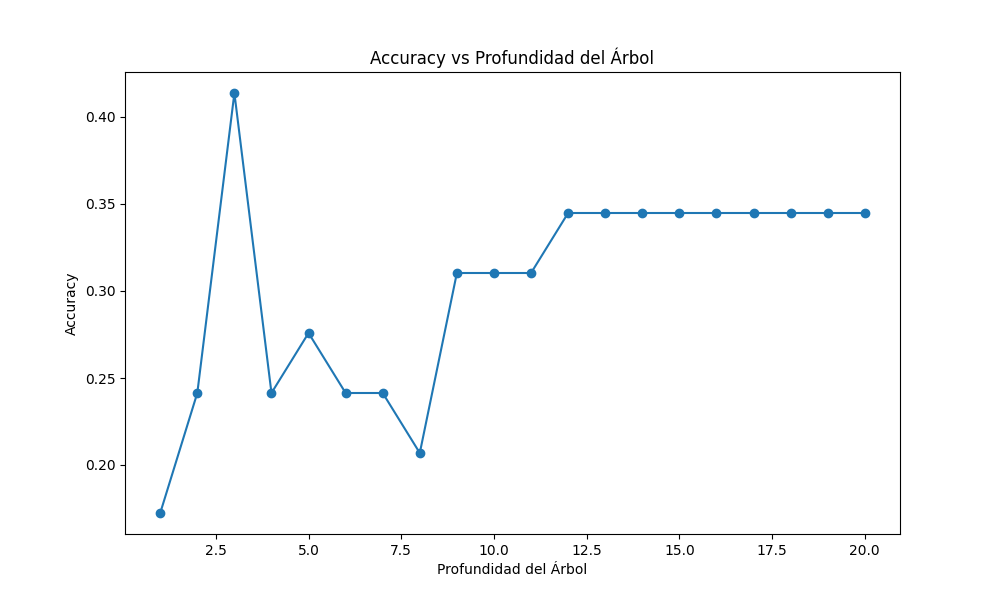

In [24]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

depths = []
accuracies = []

for depth in range(1, 21):

    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    depths.append(depth)
    accuracies.append(accuracy)
plt.figure(figsize=(10, 6))

plt.plot(depths, accuracies, marker='o')
plt.xlabel('Profundidad del Árbol')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Profundidad del Árbol')


plt.show()

**1.2. Accuracies en función del criterio de calidad:** Para este caso, se mantiene una profundidad máxima de 10, mientras que se comparan los accuracies obtenidos por los criterios de calidad: *Gini* y *Entrophy*

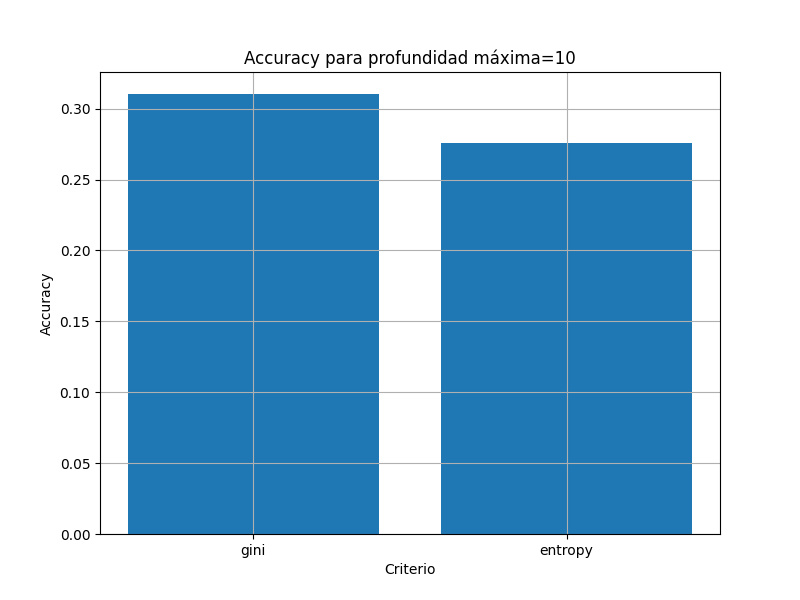

In [29]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# Definir la profundidad máxima del árbol (en este caso, 100)
max_depth = 10

# Definir los criterios a probar
criterions = ['gini', 'entropy']

# Listas para almacenar los resultados
accuracies = []

for criterion in criterions:
    # Crear el modelo con el criterio y profundidad máxima constante
    model = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth, random_state=42)

    # Entrenar el modelo
    model.fit(X_train, y_train)

    # Calcular el accuracy en el conjunto de prueba
    accuracy = model.score(X_test, y_test)

    # Almacenar el accuracy en la lista de accuracies
    accuracies.append(accuracy)

# Graficar los resultados
plt.figure(figsize=(8, 6))
plt.bar(criterions, accuracies)
plt.xlabel('Criterio')
plt.ylabel('Accuracy')
plt.title(f'Accuracy para profundidad máxima={max_depth}')
plt.grid(True)
plt.show()



**2. Random Forest**

2.1. Accuracies en función de la profundidad: En este modelo, se visualiza el accuracy obtenido para el intervalo de profundidades desde 1 a 20; los demás parámetros de mantienen por defecto

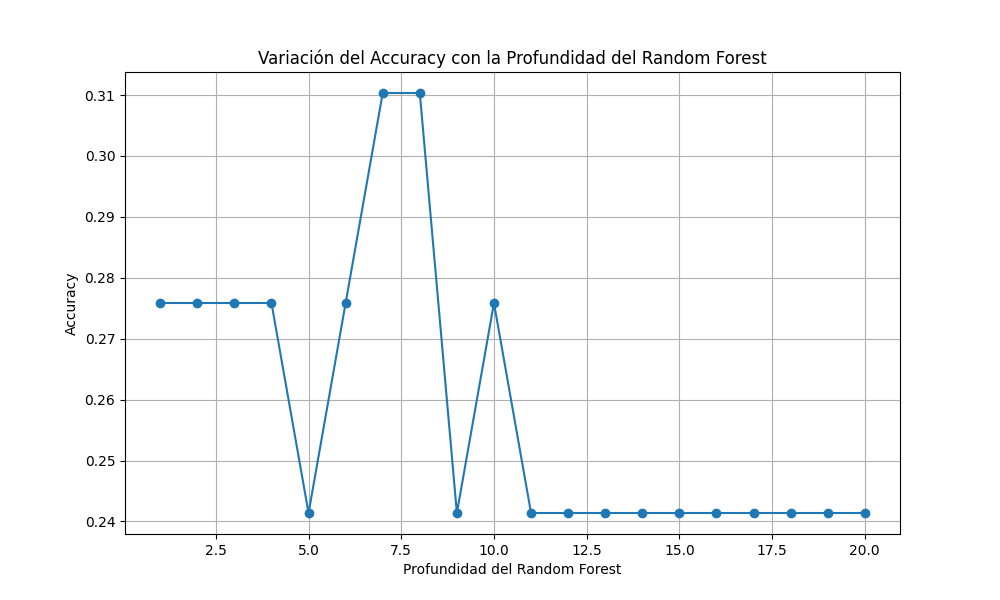

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Definir la lista para almacenar los accuracies
accuracies_rf = []

# Iterar sobre las profundidades de 1 a 100
for depth in range(1, 21):
    # Crear el modelo Random Forest con la profundidad actual
    model_rf = RandomForestClassifier(max_depth=depth, random_state=42)  # Puedes ajustar otros parámetros aquí

    # Entrenar el modelo con los datos de entrenamiento
    model_rf.fit(X_train, y_train)

    # Realizar predicciones en el conjunto de prueba
    y_pred_rf = model_rf.predict(X_test)

    # Calcular el accuracy y agregarlo a la lista de accuracies
    accuracy_rf = accuracy_score(y_test, y_pred_rf)
    accuracies_rf.append(accuracy_rf)

# Graficar los resultados
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), accuracies_rf, marker='o')
plt.xlabel('Profundidad del Random Forest')
plt.ylabel('Accuracy')
plt.title('Variación del Accuracy con la Profundidad del Random Forest')
plt.grid(True)
plt.show()


2.2. Accuracies en función del número de estimadores: En este modelo, se visualiza el accuracy obtenido para una cantidad de estimadores, definidas en el intervalo de 1 a 30; los demás parámetros de mantienen por defecto

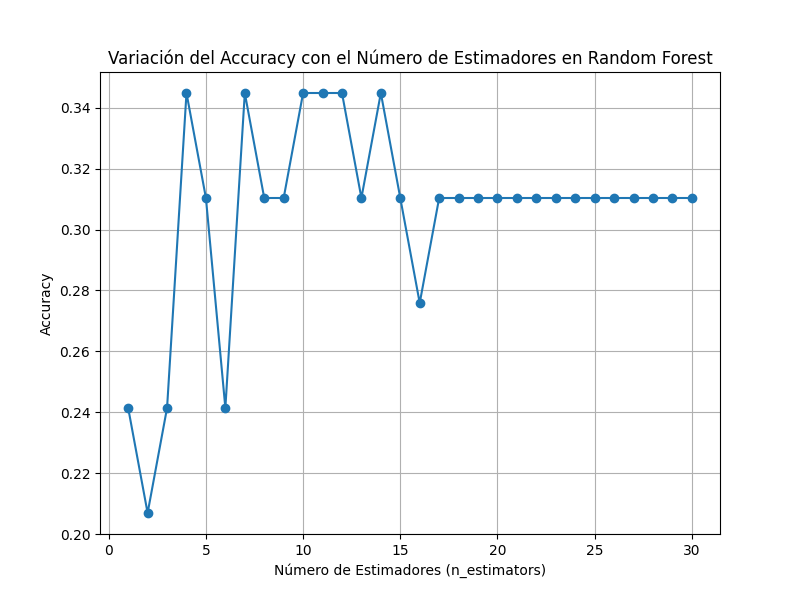

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Definir la lista para almacenar los accuracies
accuracies_rf_estimators = []

# Iterar sobre los valores de n_estimators de 1 a 30
for n_estimators_val in range(1, 31):
    # Crear el modelo Random Forest con el valor actual de n_estimators
    model_rf_estimators = RandomForestClassifier(n_estimators=n_estimators_val, random_state=42)

    # Entrenar el modelo con los datos de entrenamiento
    model_rf_estimators.fit(X_train, y_train)

    # Realizar predicciones en el conjunto de prueba
    y_pred_rf_estimators = model_rf_estimators.predict(X_test)

    # Calcular el accuracy y agregarlo a la lista de accuracies
    accuracy_rf_estimators = accuracy_score(y_test, y_pred_rf_estimators)
    accuracies_rf_estimators.append(accuracy_rf_estimators)

# Graficar los resultados
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(range(1, 31), accuracies_rf_estimators, marker='o')
plt.xlabel('Número de Estimadores (n_estimators)')
plt.ylabel('Accuracy')
plt.title('Variación del Accuracy con el Número de Estimadores en Random Forest')
plt.grid(True)
plt.show()


**3. Máquina de soporte vectorial**

3.1. Accuracies en función del kernel: En este modelo, se visualiza el accuracy obtenido, para los distintos kernels existentes. Los demás parámetros de mantienen por defecto

<ipython-input-31-e035f216cc6f>:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(8, 6))


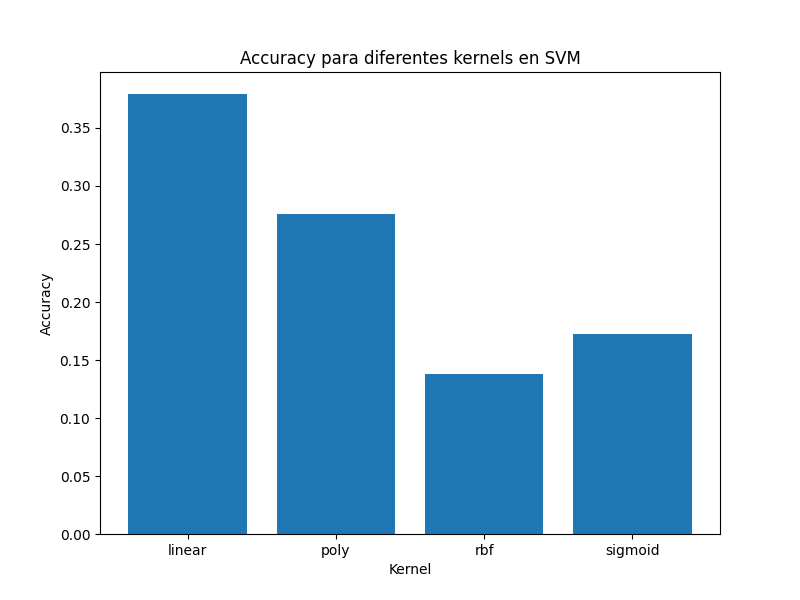

In [31]:
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# Datos de entrenamiento y prueba (X_train, X_test, y_train, y_test)

# Lista de kernels a probar
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

# Lista para almacenar los accuracies para cada kernel
accuracies = []

for kernel in kernels:
    # Crear el modelo SVM con el kernel actual
    svm = SVC(kernel=kernel, random_state=42)

    # Entrenar el modelo
    svm.fit(X_train, y_train)

    # Realizar predicciones en el conjunto de prueba
    y_pred = svm.predict(X_test)

    # Calcular el accuracy y agregarlo a la lista de accuracies
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Graficar los resultados
plt.figure(figsize=(8, 6))
plt.bar(kernels, accuracies)
plt.xlabel('Kernel')
plt.ylabel('Accuracy')
plt.title('Accuracy para diferentes kernels en SVM')
plt.show()


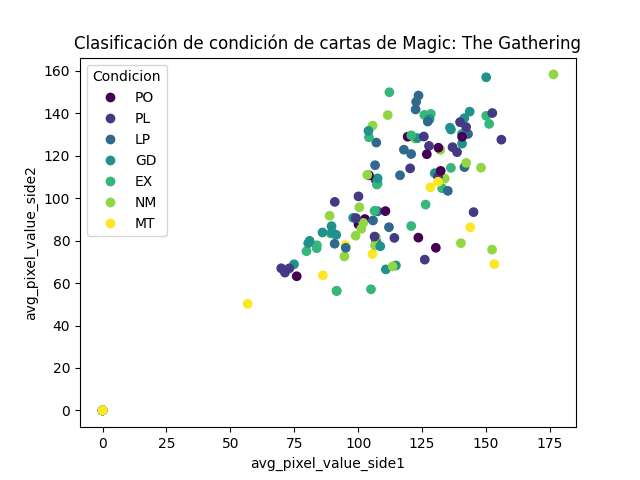

In [38]:
# Mapeo de etiquetas de clase a valores numéricos
class_mapping = {'PO': 0, 'PL': 1, 'LP': 2, 'GD': 3, 'EX': 4, 'NM': 5, 'MT': 6}
numeric_labels = [class_mapping[label] for label in y]

# Crear una nueva figura
plt.figure()

# Graficar los datos
scatter = plt.scatter(X[:, 0], X[:, 1], c=numeric_labels)
plt.xlabel('avg_pixel_value_side1')
plt.ylabel('avg_pixel_value_side2')
plt.title('Clasificación de condición de cartas de Magic: The Gathering')

# Agregar la leyenda con los valores del diccionario
legend_labels = list(class_mapping.keys())
plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels, title='Condicion')

# Mostrar el gráfico de dispersión
plt.show()


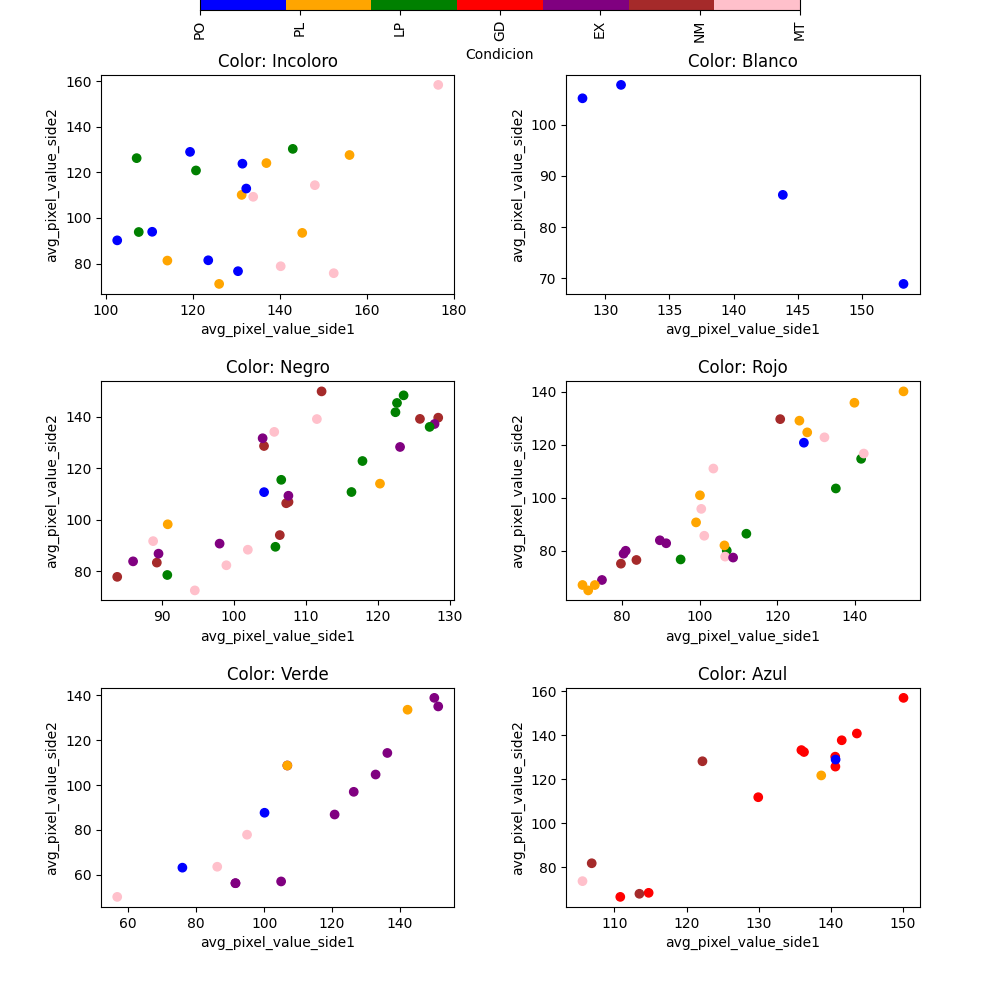

In [39]:
from matplotlib.colors import ListedColormap

# Crear una lista de colores por defecto para cada condición
default_colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink']
color_mapping = {'Incoloro': 0, 'Blanco': 1, 'Negro': 2, 'Rojo': 3, 'Verde': 4, 'Azul': 5}

# Crear una instancia de ListedColormap con los colores por defecto
cmap = ListedColormap(default_colors)

# Mapeo de etiquetas de clase a valores numéricos
class_mapping = {'PO': 0, 'PL': 1, 'LP': 2, 'GD': 3, 'EX': 4, 'NM': 5, 'MT': 6}

# Crear una nueva figura con 6 subplots en 2 columnas
fig, axs = plt.subplots(3, 2, figsize=(10, 10))
fig.tight_layout(pad=5.0)

# Obtener los valores únicos de "color"
unique_colors = np.unique(X[:, 2])

# Generar un scatter plot por cada valor único de "color"
for i, color in enumerate(unique_colors):
    # Filtrar los datos por el valor de "color" actual
    filtered_indices = np.where((X[:, 2] == color) & (X[:, 0] != 0) & (X[:, 1] != 0))
    filtered_X = X[filtered_indices]
    filtered_y = y[filtered_indices]

    # Obtener las etiquetas numéricas correspondientes
    numeric_labels = np.array([class_mapping[label] for label in filtered_y])

    # Obtener los índices de subplots correspondientes
    row = i // 2
    col = i % 2

    # Graficar los datos filtrados en el subplot correspondiente
    scatter = axs[row, col].scatter(filtered_X[:, 0], filtered_X[:, 1], c=numeric_labels, cmap=cmap)
    axs[row, col].set_xlabel('avg_pixel_value_side1')
    axs[row, col].set_ylabel('avg_pixel_value_side2')
    axs[row, col].set_title('Color: ' + list(color_mapping.keys())[i])

# Ajustar los espacios entre los subplots
plt.subplots_adjust(hspace=0.4)

# Crear una barra de colores personalizada en posición horizontal con margen inferior
cbar_ax = fig.add_axes([0.2, 0.99, 0.6, 0.05])  # [left, bottom, width, height]
cbar = fig.colorbar(scatter, cax=cbar_ax, orientation='horizontal', ticks=np.arange(len(class_mapping)))
cbar.ax.set_xticklabels(list(class_mapping.keys()), rotation='vertical')
cbar.ax.set_xlabel('Condicion')

# Mostrar los gráficos de dispersión y la barra de colores
plt.show()



In [ ]:
import pandas as pd

# Agregar las columnas de avg_pixel_value_side1 y avg_pixel_value_side2 al dataset
cleaned_data['avg_pixel_value_side1'] = X[:, 0]
cleaned_data['avg_pixel_value_side2'] = X[:, 1]

# Verificar los valores únicos en el campo Color
unique_colors = cleaned_data['Color'].unique()

# Limpiar los valores eliminando espacios adicionales
cleaned_data['Color'] = cleaned_data['Color'].str.strip()

# Verificar los valores únicos nuevamente después de limpiar
unique_colors = cleaned_data['Color'].unique()

# Reemplazar los valores en el campo Color usando el mapeo
cleaned_data['Color'] = cleaned_data['Color'].replace(color_mapping)

# Convertir el campo Año a tipo entero
cleaned_data['Fecha'] = cleaned_data['Fecha'].astype(int)



['Verde' 'Azul' 'Rojo' 'Negro' 'Incoloro' 'Blanco']
['Verde' 'Azul' 'Rojo' 'Negro' 'Incoloro' 'Blanco']
          Nombre    Coleccion  Fecha Condicion  \
0  Gaea's Cradle  Urza's Saga   1999        EX   
1  Gaea's Cradle  Urza's Saga   1999        EX   
2  Gaea's Cradle  Urza's Saga   1999        EX   
3  Gaea's Cradle  Urza's Saga   1999        EX   
4  Gaea's Cradle  Urza's Saga   1999        EX   

                                                 URL  \
0  https://marketplace-article-scans-production-c...   
1  https://marketplace-article-scans-production-c...   
2  https://marketplace-article-scans-production-c...   
3  https://marketplace-article-scans-production-c...   
4  https://marketplace-article-scans-production-c...   

                                  result_image_side1  \
0  [[[19, 31, 88], [16, 18, 75], [21, 26, 84], [2...   
1  [[[28, 33, 36], [34, 39, 42], [24, 29, 32], [4...   
2  [[[85, 90, 93], [42, 47, 50], [61, 66, 69], [4...   
3  [[[192, 174, 154], [210, 192, 1

In [ ]:
# Mostrar el dataset actualizado
cleaned_data.head()

Nombre    Coleccion  Fecha Condicion  \
0  Gaea's Cradle  Urza's Saga   1999        EX   
1  Gaea's Cradle  Urza's Saga   1999        EX   
2  Gaea's Cradle  Urza's Saga   1999        EX   
3  Gaea's Cradle  Urza's Saga   1999        EX   
4  Gaea's Cradle  Urza's Saga   1999        EX   

                                                 URL  \
0  https://marketplace-article-scans-production-c...   
1  https://marketplace-article-scans-production-c...   
2  https://marketplace-article-scans-production-c...   
3  https://marketplace-article-scans-production-c...   
4  https://marketplace-article-scans-production-c...   

                                  result_image_side1  \
0  [[[19, 31, 88], [16, 18, 75], [21, 26, 84], [2...   
1  [[[28, 33, 36], [34, 39, 42], [24, 29, 32], [4...   
2  [[[85, 90, 93], [42, 47, 50], [61, 66, 69], [4...   
3  [[[192, 174, 154], [210, 192, 172], [206, 188,...   
4  [[[182, 166, 140], [184, 169, 141], [181, 165,...   

                                  result_image_side2  Color  \
0  [[[35, 46, 124], [34, 45, 124], [17, 24, 95], ...      4   
1  [[[34, 36, 35], [89, 91, 90], [45, 47, 46], [3...      4   
2  [[[68, 70, 67], [82, 84, 81], [80, 82, 79], [8...      4   
3  [[[218, 212, 180], [211, 205, 173], [207, 200,...      4   
4  [[[237, 233, 222], [237, 233, 222], [237, 233,...      4   

   avg_pixel_value_side1  avg_pixel_value_side2  
0             106.821767             108.711711  
1             151.227339             135.018044  
2             150.077956             138.832278  
3             132.798778             104.698739  
4             120.738889              86.888317

In [ ]:
# Especifica el nombre de archivo para el archivo CSV de salida
output_file = 'dataset_parcial.csv'

# Exporta el dataset actualizado a un archivo CSV
cleaned_data.to_csv(output_file, index=False)